In [1]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt

In [2]:
file = "AB_US_2020.csv"

In [3]:
original_df = pd.read_csv(file)

C:\Users\k3net\AppData\Local\Temp\ipykernel_7688\3279515133.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv(file)


In [4]:
df = original_df.set_index("id")


In [5]:
df_rename = df.rename(columns={
    "city" : "City",
    "id" : "ID",
    "name" : "Listing Name",
    "host_id" : "Host ID",
    "host_name" : "Host Name",
    "neighbourhood" : "Neighbourhood",
    "room_type" : "Room Type",
    "price": "Price",
    "minimum_nights": "Minimum Nights",
    "number_of_reviews" : "Number Of Reviews",
    "last_review": "Last Review",
    "reviews_per_month": "Reviews Rate(per month)",
    "calculated_host_listings_count": "Total Number Listing by Host",
    "availability_365": "Yearly availability",
    "StateNames": "State Name"
})

In [6]:
df_rename.drop(["neighbourhood_group","Host ID"], axis=1)

,Listing Name,Host Name,Neighbourhood,latitude,longitude,Room Type,Price,Minimum Nights,Number Of Reviews,Last Review,Reviews Rate(per month),Total Number Listing by Host,Yearly availability,City,State Name
id,,,,,,,,,,,,,,,
38585,Charming Victorian home - twin beds + breakfast,Evelyne,Asheville,35.651460,-82.627920,Private room,60,1,138,16/02/20,1.14,1,0,Asheville,NC
80905,French Chic Loft,Celeste,Asheville,35.597790,-82.555400,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,Asheville,NC
108061,Walk to stores/parks/downtown. Fenced yard/Pet...,Lisa,Asheville,35.606700,-82.555630,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville,NC
155305,Cottage! BonPaul + Sharky's Hostel,BonPaul,Asheville,35.578640,-82.595780,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville,NC
160594,Historic Grove Park,Elizabeth,Asheville,35.614420,-82.541270,Private room,125,30,58,19/10/15,0.52,1,0,Asheville,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45506143,"DC Hidden In Plain ""Site""",Marci,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,NaN,NaN,2,99,Washington D.C.,DC
45511428,DC 3 BR w/ screen porch 3 blck to metro w/ par...,Thomas,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,NaN,NaN,1,300,Washington D.C.,DC
45514685,Charming Penthouse Apt w/ Rooftop Terrace in L...,Bassem,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,NaN,NaN,1,173,Washington D.C.,DC


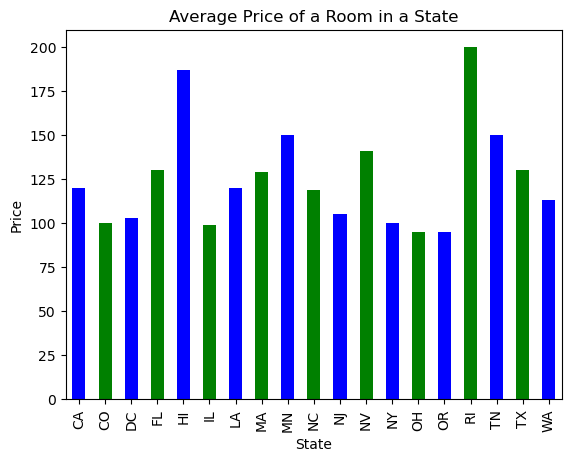

In [7]:
price_state = df_rename.groupby(['State Name'])['Price'].agg('median')
ax = price_state.plot(kind = "bar", color=['blue', "green"])
ax.set_ylabel('Price')
ax.set_xlabel("State")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Average Price of a Room in a State')
plt.show()

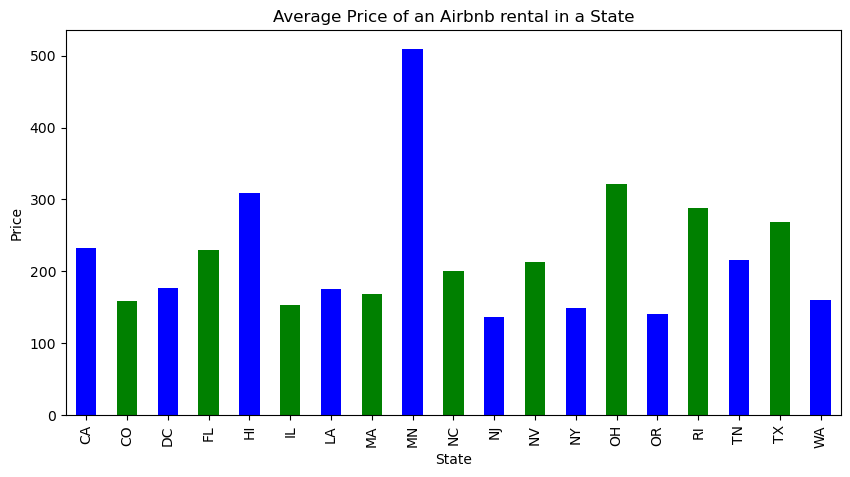

In [8]:
price_state = df_rename.groupby(['State Name'])['Price'].agg('mean')
ax = price_state.plot(kind = "bar", color=['blue', "green"])
ax.set_ylabel('Price')
ax.set_xlabel("State")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Average Price of an Airbnb rental in a State')
plt.show()

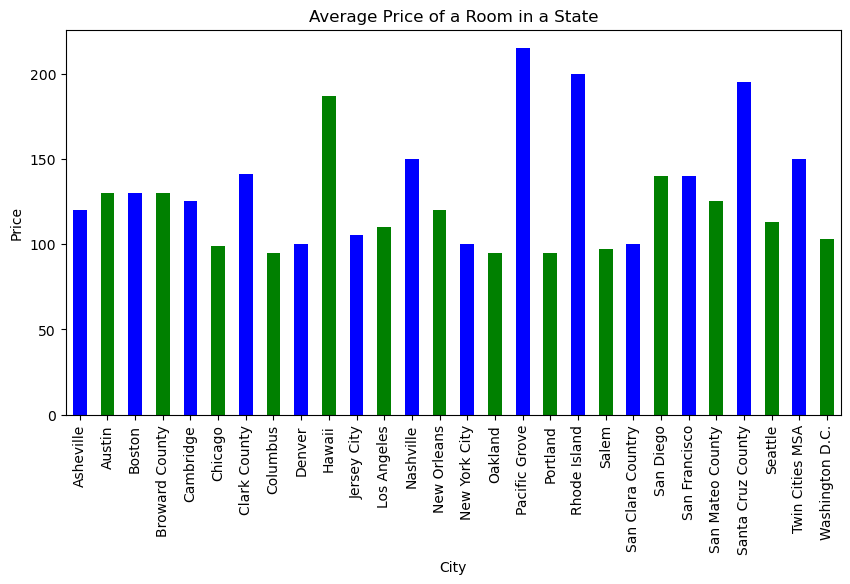

In [9]:
price_state = df_rename.groupby(['City'])['Price'].agg('median')
ax = price_state.plot(kind = "bar", color=['blue', "green"])
ax.set_ylabel('Price')
ax.set_xlabel("City")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Average Price of a Room in a State')
plt.show()

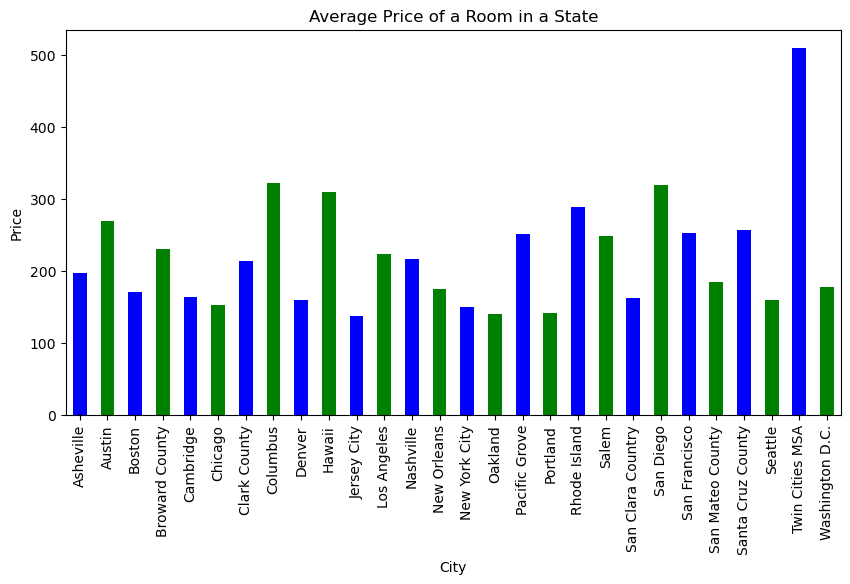

In [10]:
price_state = df_rename.groupby(['City'])['Price'].agg('mean')
ax = price_state.plot(kind = "bar", color=['blue', "green"])
ax.set_ylabel('Price')
ax.set_xlabel("City")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Average Price of a Room in a State')
plt.show()

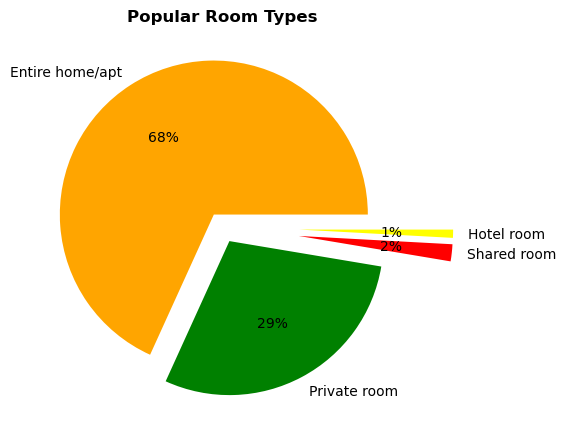

In [11]:
ax = df_rename['Room Type'].value_counts()
explode=[0.1, 0.1, 0.5, 0.5]
ax.plot(kind='pie',figsize=(5,5),title='Most popular room type',fontsize=10,colors=['orange','green','red','yellow'], autopct="%1.0f%%",explode=explode)
plt.title("Popular Room Types",fontweight='bold',pad=10)
plt.ylabel("")
plt.show()

In [12]:
df_sum =df_rename.groupby(["City"]).agg(
    {
    "Price":["mean","median","var","std","sem"]
    }
)

In [13]:
df_sum.head()

Price                                             
                      mean median            var         std        sem
City                                                                   
Asheville       196.639344  120.0  953999.378789  976.728918  21.447154
Austin          269.290054  130.0  379190.383805  615.784365   6.027839
Boston          170.331836  130.0   58289.133111  241.431425   4.178165
Broward County  230.093295  130.0  188901.004743  434.627432   4.171019
Cambridge       163.072886  125.0   24655.487873  157.020661   4.894960

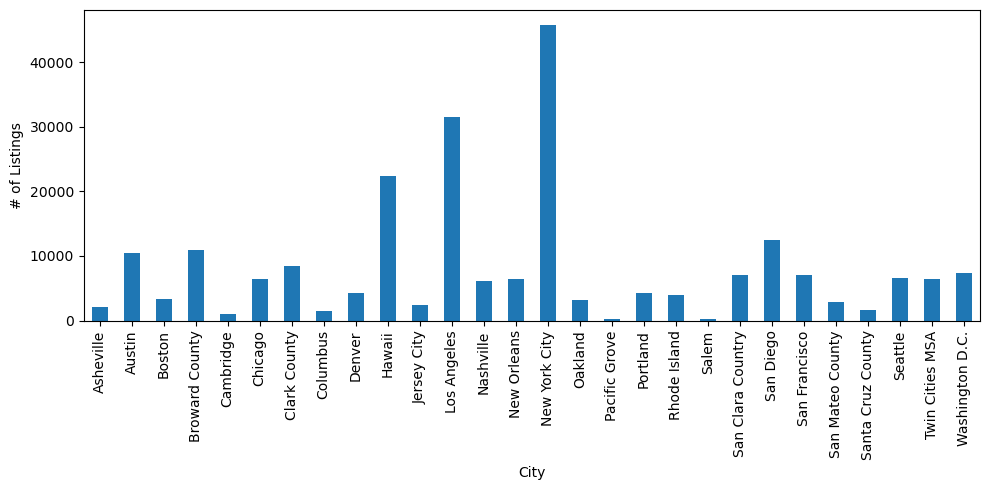

In [14]:
city=df_rename.groupby(["City"])

listings_per_city = city["City"].count()

count_chart = listings_per_city.plot(kind='bar', figsize=(10,5))

count_chart.set_xlabel("City")
count_chart.set_ylabel("# of Listings")
plt.tight_layout()
plt.show()

In [15]:
type(listings_per_city)


pandas.core.series.Series

In [16]:
df_sum['listing']=listings_per_city
df_sum.head()

Price                                               \
                      mean median            var         std        sem   
City                                                                      
Asheville       196.639344  120.0  953999.378789  976.728918  21.447154   
Austin          269.290054  130.0  379190.383805  615.784365   6.027839   
Boston          170.331836  130.0   58289.133111  241.431425   4.178165   
Broward County  230.093295  130.0  188901.004743  434.627432   4.171019   
Cambridge       163.072886  125.0   24655.487873  157.020661   4.894960   

               listing  
                        
City                    
Asheville         2074  
Austin           10436  
Boston            3339  
Broward County   10858  
Cambridge         1029

In [17]:
df_sum = df_sum.reset_index()
df_sum.head()

City       Price                                               \
                         mean median            var         std        sem   
0       Asheville  196.639344  120.0  953999.378789  976.728918  21.447154   
1          Austin  269.290054  130.0  379190.383805  615.784365   6.027839   
2          Boston  170.331836  130.0   58289.133111  241.431425   4.178165   
3  Broward County  230.093295  130.0  188901.004743  434.627432   4.171019   
4       Cambridge  163.072886  125.0   24655.487873  157.020661   4.894960   

  listing  
           
0    2074  
1   10436  
2    3339  
3   10858  
4    1029

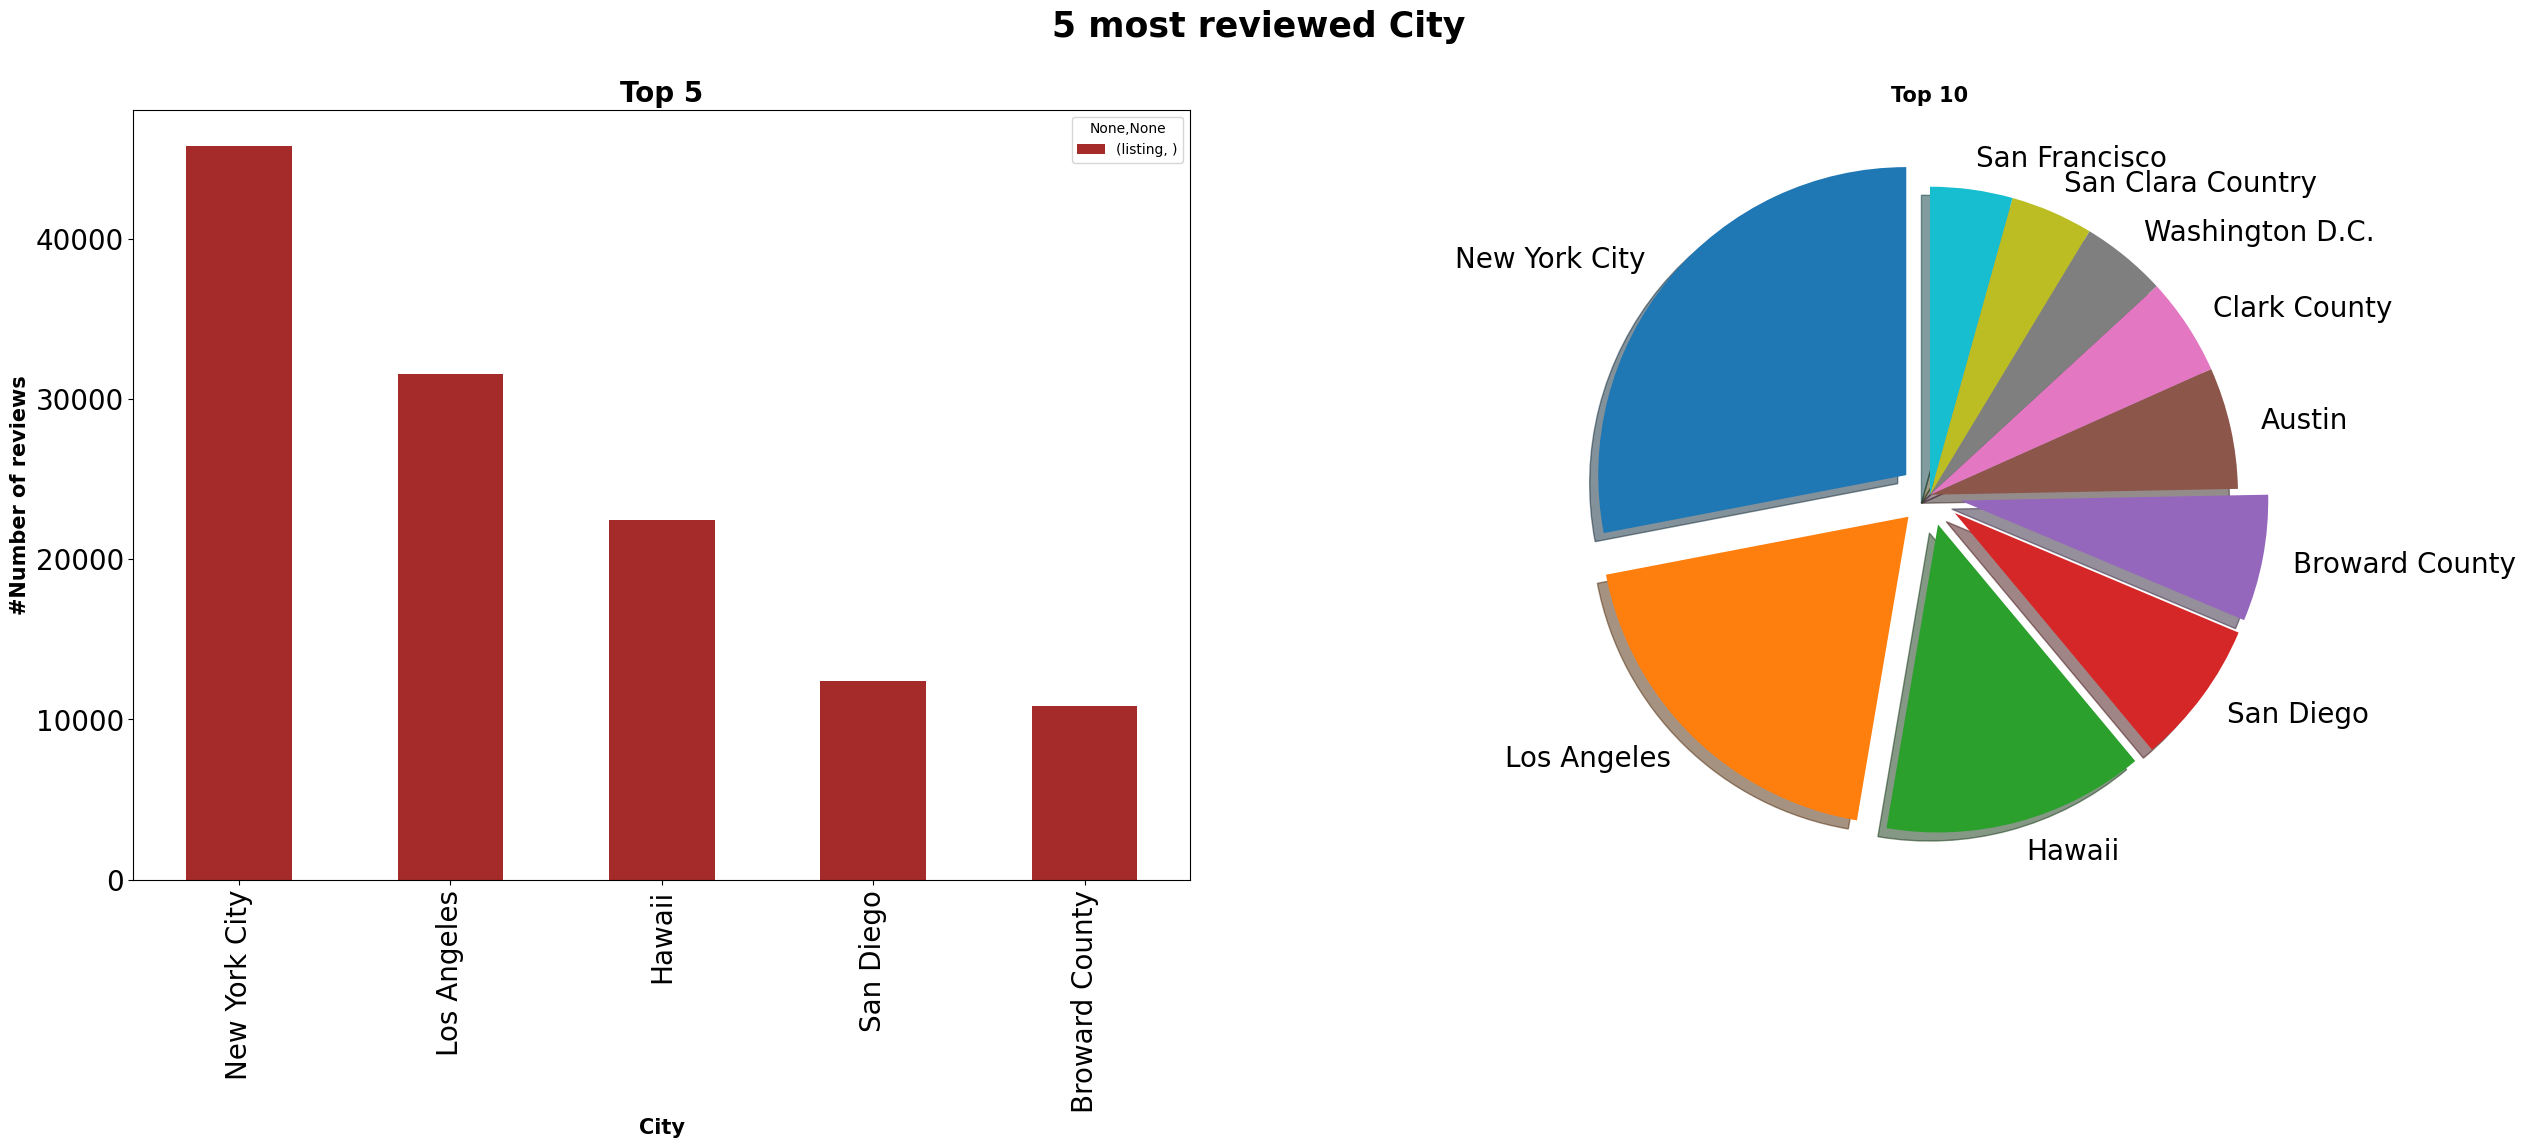

In [18]:
temp = df_sum[['City','listing']]
temp = temp.sort_values(['listing'],ascending=False)

explode = (0.1,0.1,0.1,0.1,0.1,0,0,0,0,0)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('5 most reviewed City',fontweight='bold',fontsize=25)
temp.head(5).plot.bar(x='City',color='brown',figsize=(20,15),fontsize=20,ax=ax1)
ax1.set_title('Top 5',fontweight='bold',fontsize=20)
ax1.set_ylabel('#Number of reviews',fontweight='bold',fontsize=15)
ax1.set_xlabel('City',fontweight='bold',fontsize=15)
temp.head(10).plot(kind='pie',x='City',y='listing',figsize=(30,10),startangle=90, shadow=True, labels=temp['City'], legend = False,fontsize=20,explode=explode,ax=ax2)
ax2.set_title('Top 10',fontweight='bold',fontsize=15)
ax2.set_ylabel('')
ax2.set_xlabel('')
fig.subplots_adjust(hspace=0.5)

In [20]:
list(df_sum.value_counts("City").index)

['Asheville',
 'Austin',
 'Twin Cities MSA',
 'Seattle',
 'Santa Cruz County',
 'San Mateo County',
 'San Francisco',
 'San Diego',
 'San Clara Country',
 'Salem',
 'Rhode Island',
 'Portland',
 'Pacific Grove',
 'Oakland',
 'New York City',
 'New Orleans',
 'Nashville',
 'Los Angeles',
 'Jersey City',
 'Hawaii',
 'Denver',
 'Columbus',
 'Clark County',
 'Chicago',
 'Cambridge',
 'Broward County',
 'Boston',
 'Washington D.C.']

In [22]:
df_rename.head(100)

,Listing Name,Host ID,Host Name,neighbourhood_group,Neighbourhood,latitude,longitude,Room Type,Price,Minimum Nights,Number Of Reviews,Last Review,Reviews Rate(per month),Total Number Listing by Host,Yearly availability,City,State Name
id,,,,,,,,,,,,,,,,,
38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,Asheville,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville,NC
80905,French Chic Loft,427027,Celeste,NaN,Asheville,35.59779,-82.55540,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,Asheville,NC
108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,Asheville,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville,NC
155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,Asheville,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville,NC
160594,Historic Grove Park,769252,Elizabeth,NaN,Asheville,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084395,Modern Tree Top Bungalow - Longer Term Welcome,15694798,Josh,NaN,Asheville,35.62410,-82.53003,Entire home/apt,132,1,282,4/9/2020,3.67,3,324,Asheville,NC
3095136,Spivey Mountain Cabin w/Hot Tub!!,15694798,Josh,NaN,Asheville,35.59519,-82.63967,Entire home/apt,164,1,335,11/9/2020,4.34,3,296,Asheville,NC
3116699,Asheville Modern Round House,15694798,Josh,NaN,Asheville,35.62352,-82.52959,Entire home/apt,177,1,276,9/9/2020,3.71,3,295,Asheville,NC


In [23]:
df_rename["city_state"] = df_rename["City"]+"_"+df_rename["State Name"]
df_rename.head()

,Listing Name,Host ID,Host Name,neighbourhood_group,Neighbourhood,latitude,longitude,Room Type,Price,Minimum Nights,Number Of Reviews,Last Review,Reviews Rate(per month),Total Number Listing by Host,Yearly availability,City,State Name,city_state
id,,,,,,,,,,,,,,,,,,
38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,Asheville,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville,NC,Asheville_NC
80905,French Chic Loft,427027,Celeste,NaN,Asheville,35.59779,-82.55540,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,Asheville,NC,Asheville_NC
108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,Asheville,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville,NC,Asheville_NC
155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,Asheville,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville,NC,Asheville_NC
160594,Historic Grove Park,769252,Elizabeth,NaN,Asheville,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville,NC,Asheville_NC
